## Scientific Computation Lab 5 solution

### Task 1: Creating a heap (to be completed after watching video on binary heaps)

heapq.heapify will re-order the elements in a list so that it can be interpreted as a binary heap. First, draw (by hand) a binary heap whose keys are the elements in the list below. Then, apply the heapify function to the list, and check that you understand how the elements have been ordered. What are the children of the element with key=2?

In [1]:
import heapq
L = [3,5,8,9,3,2,1]
#add code here
heapq.heapify(L)
print("heapified L:", L)

heapified L: [1, 3, 2, 9, 5, 3, 8]


The binary tree is:\
        1\
     3      2\
   9   5   3  8\
   3 and 8 are the children of 2

### Task 2: Simulating random walks

Here, you will work with simulations of 1-D random walks: $$X_{i+1} = X_i + R_i$$
where $R_i$ is a random number which is either +1 or -1 with equal probability (i.e. it represents a coin flip). 
Code similar to that developed in lecture is provided below. Browse through the code; check that you understand how it works.

1. We saw in lecture that increasing $M$ improves the agreement between the computed statistics and the analytical expected values. Investigate the rate of convergence of $\epsilon_i = |Xstd[i]-\sqrt{i}|$ as $M$ increases for $i=100$. Assume that $\epsilon_i \sim M^{-\gamma}$ and construct an estimate of $\gamma$ (Note: this estimate can fluctuate substantially from one run to the next). 

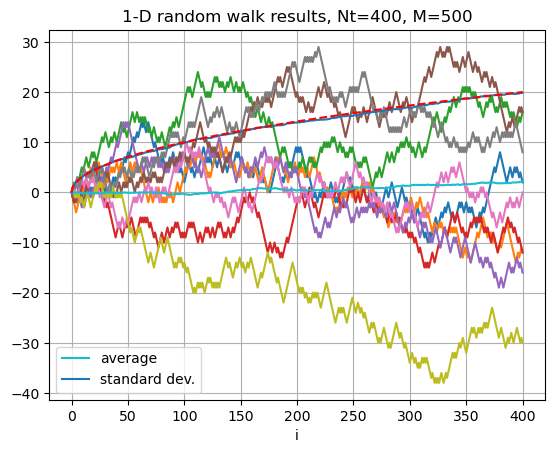

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def rwalk(Nt=400,M=500,display=False):
    """Compute M Nt-step 1-D random walks
    """
    X = np.zeros((Nt+1,M))
    R = np.random.choice((-1,1),(Nt,M))
    
    #M Nt-step random walks
    for i in range(Nt):
        X[i+1,:] = X[i,:] + R[i,:]
        
    Xave = X.mean(axis=1)
    Xstd = X.std(axis=1)
     
        
    #display results
    if display:
        plt.figure()
        plt.plot(X[:,::60])
        plt.plot(Xave,label='average')
        plt.plot(Xstd,label='standard dev.')
        plt.plot(np.sqrt(np.arange(Nt+1)),'r--')
        plt.grid()
        plt.legend()
        plt.xlabel('i')
        plt.title('1-D random walk results, Nt=%d, M=%d' %(Nt,M))
    return X,Xave,Xstd
out = rwalk(display=True)

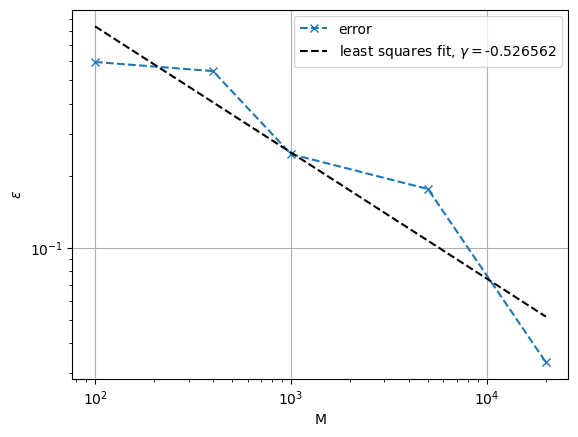

In [38]:
#Add code here
Mvalues = [100,400,1000,5000,20000]
eps = []
i=100
Xstd_theory = np.sqrt(i)
for M in Mvalues:
    _,Xa,Xs = rwalk(i-1,M)
    eps.append(np.abs(Xs[-1]-Xstd_theory))

    
p = np.polyfit(np.log(Mvalues),np.log(eps),1)

    
plt.figure()
plt.loglog(Mvalues,eps,'x--',label='error')
plt.plot(Mvalues,np.exp(p[1])*Mvalues**p[0],'k--',label=r'least squares fit, $\gamma=$%f'%(p[0]))
plt.xlabel('M')
plt.ylabel(r'$\epsilon$')
plt.grid()
plt.legend()            


The figure indicates $\gamma \approx 0.5$, however this estimate fluctuates a lot from one run to the next. A more detailed examination of the results would consider the distribution of values of $\epsilon$ as $M$ increases. 

### Task 4: Numerical solution of predator-prey dynamics using explicit Euler method (relevant material in pre-recorded video online)

You will now use the explicit Euler method to solve the following IVP:

$\frac{dx}{dt} =  x - x y $

$\frac{dy}{dt} =  x y - y$

$x(0)=1 + \delta, ~ y(0)=1+\delta$

and $\delta$ is a parameter that you will set and vary.

1) You will compute a numerical solution to this problem at times $t_i=i \Delta t, ~ i=1,2,3,..., Nt$ where $\Delta t$ is the time step that you will set. The solution should be stored in an $Nt+1$ x $2$ Numpy array, z, where the first column contains $x$, the second column contains $y$, and the first row contains the initial conditions. 
Add code to the cell below to compute this solution using the explicit Euler method. Initially set $\Delta t=0.01$, $\delta = 0.05$, and $Nt=2000$. Make a plot that displays both $x(t)$ and $y(t)$. The solutions should be oscillatory -- does the frequency of oscillation match what you expect based on analytical results for small perturbations?

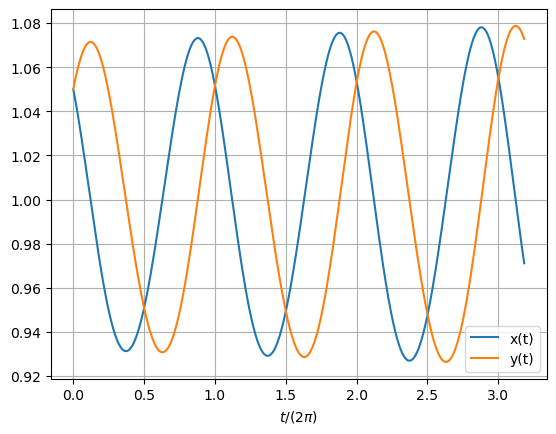

In [8]:
import numpy as np
import matplotlib.pyplot as plt
delta = 0.05
Dt = 0.01
Nt = 2000
t = np.linspace(0,Nt*Dt,Nt+1)
z = np.zeros((Nt+1,2))
z[0,:] = 1 + delta
#Add code here

for i in range(Nt):
    term = z[i,0]*z[i,1]
    z[i+1,0] = z[i,0] +  Dt*(z[i,0] - term)
    z[i+1,1] = z[i,1] + Dt*(-z[i,1] + term)

plt.figure()
plt.plot(t/(2*np.pi),z)
plt.xlabel(r'$t/(2\pi)$')
plt.legend(('x(t)','y(t)'))
plt.grid()

Analytical results indicate oscillations of the form $\sim exp(i\sqrt{a}t)$. Here $a=1$, so the period of oscillation should be $2\pi/\sqrt{a}=2\pi$ which is close to what is seen in the results above.

2) Now compute solutions over the same timespan with $\Delta t=0.1$ and $\Delta t=0.001$. Create a plot of $x$ vs. $t$ for all three values of $\Delta t$ used. Can you explain the results shown in the plot?

dt,Nt,dt*Nt= 0.1 200 20.0
dt,Nt,dt*Nt= 0.01 2000 20.0
dt,Nt,dt*Nt= 0.001 20000 20.0


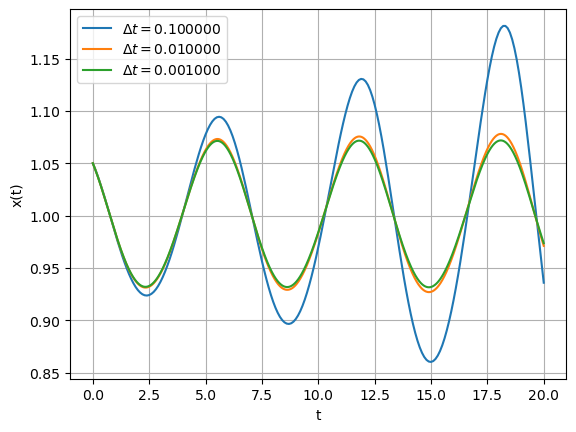

In [14]:
import numpy as np
import matplotlib.pyplot as plt
#Add code here
def solve_xy(delta,Dt,Nt):
    t = np.linspace(0,Nt*Dt,Nt+1)
    z = np.zeros((Nt+1,2))
    z[0,:] = 1 + delta
    for i in range(Nt):
        term = z[i,0]*z[i,1]
        z[i+1,0] = z[i,0] +  Dt*(z[i,0] - term)
        z[i+1,1] = z[i,1] + Dt*(-z[i,1] + term)
    return t,z

delta = 0.05  
Dtvals = [0.1,0.01,0.001]
T = 20
solns = []
ts = []
plt.figure()
for dt in Dtvals:
    Nt = int(T/dt)
    print("dt,Nt,dt*Nt=",dt,Nt,dt*Nt)
    t,z = solve_xy(delta,dt,Nt)
    plt.plot(t,z[:,0],label=r'$\Delta t=$%f'%(dt))

plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.grid()
    

The explicit Euler method is numerically unstable for oscillatory problems (solutions that should be bounded instead become unrealistically large as $t \to \infty$, and this instability appears more quickly the larger that $\Delta t$ is.

3) Now, you will investigate the accuracy of your solution, $x_{comp}(t)$. You have been provided with a function which computes the exact solution, $x_1(t)$, for the perturbation problem discussed in lecture 10. Compute and display the error, $\epsilon(t)=|(1+x_{1}(t=20)-x_{comp}(t=20)|$ using $\delta=1e-6$, $\Delta t=0.001$, and $\Delta t=0.0005$.
How does the error change when you change $\Delta t$? Is the behavior what you expect?

In [34]:
def x1_exact(t,delta):
    """
    Compute exact solution for x1(t) corresponding to perturbation problem from lecture 
     10 with a=1, x(10)=delta, and y(10)=delta
    """
    l1,l2 = 1j,-1j
    x = 2*delta*np.real((0.5+0.5j)*np.exp(l1*t))
    return x

xe = x1_exact(20,1e-6)

dt,Nt,dt*Nt= 0.001 20000 20.0
dt,Nt,dt*Nt= 0.0005 40000 20.0


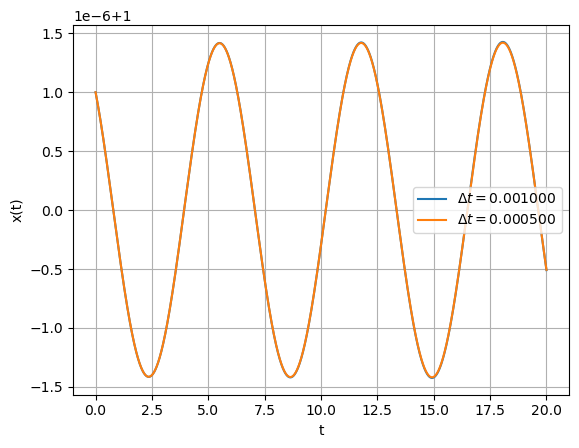

In [36]:
#Add code here
#Set parameters
delta = 1e-6  
Dtvals = [0.001 ,0.0005] #time steps
T = 20
ts = []
plt.figure()
xcomp = []
for dt in Dtvals:
    Nt = int(T/dt)
    print("dt,Nt,dt*Nt=",dt,Nt,dt*Nt)
    t,z = solve_xy(delta,dt,Nt)
    plt.plot(t,z[:,0],label=r'$\Delta t=$%f'%(dt))
    xcomp.append(z[-1,0])

plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend()
plt.grid()

In [39]:
#xcomp contains the solutions computed using Euler's method; these 
#solutions are compared with 1+x_1(t=20) 
print(t[-1],xcomp,1+xe,np.abs(np.array(xcomp)-1-xe))

20.0 [0.9999994900711913, 0.9999994926078376] 0.9999994951368111 [5.06561982e-09 2.52897348e-09]


We compare the numerical solutions at $t=20$ with $1+x_1(t=20)$, and the output above shows that the magnitude of the difference decreases from 5e-9 to 2.5e-9 when the time step is reduced from 0.001 to 0.0005. The error for the explicit Euler method is expected to decrease linearly with $\Delta T$, and this is (almost) exactly what we see.

### Task 4 (optional): Practice with arrays, eigenvalues and eigenvectors
These are a few exercises to give you practice with numerical linear algebra and numpy 

1) Use the *np.random.rand* function to generate a 3 x 3 matrix, N 

In [ ]:
import numpy as np
#Add code here
N = np.random.rand(3,3)
print(N)

[[0.29186206 0.90106292 0.88172884]
 [0.96511324 0.80878356 0.18047965]
 [0.50145582 0.95677064 0.84264926]]


2) Compute the eigenvalues and eigenvectors of N:

In [ ]:
#Add code here
l,v = np.linalg.eig(N)
print('eigenvalues:',l)
print('eigenvectors (columns):\n',v)

eigenvalues: [ 2.08651148 -0.23667391  0.09345731]
eigenvectors (columns):
 [[ 0.57264588  0.67963721  0.39377102]
 [ 0.52184676 -0.67640699 -0.68572157]
 [ 0.63225996  0.28384299  0.61215219]]


3) Verify that $\textrm{det}(N-\lambda_1 I)=0$ where $\lambda_1$ is the first eigenvalue of N:

In [ ]:
#Add code here
l1 = l[0]
I = np.eye(3)
check = np.linalg.det(N-np.dot(l1,I))
print(check)

9.162396600061525e-15


4) Verify that $N v_1 = \lambda_1 v_1$ where $v_1$ is the first eigenvector of N:

In [ ]:
#Add code here
v1 = v[:,0]
check = np.dot(N,v1)-l1*v1
print(check)

[1.55431223e-15 6.66133815e-16 1.33226763e-15]


**Note:** Python uses double precision arithmetic when working with floats, so we expect about 16 digits on precision for a numerical calculation. Consequently, a float with a magnitude that is $\approx 1e-15$ or smaller can be interpreted as zero.